In [1]:
import sys
sys.path.append("..")

import random

from tree_parser import file_contents, meta_math_database


from expanding import construct_proof, expand_proof_step_ps, expand_all_nodes_with_depth

In [2]:
%%time

text = file_contents("../set_mod.mm")
database = meta_math_database(text,n=5000)

included 3651825 tokens from ../set_mod.mm
proposition: 5000CPU times: user 24.2 s, sys: 607 ms, total: 24.8 s
Wall time: 25 s


dfss2 2803


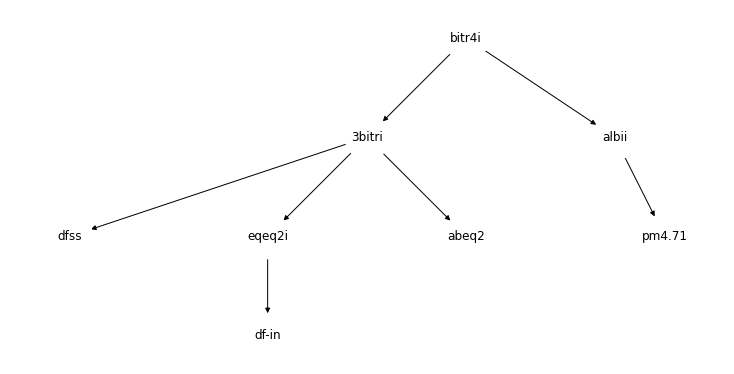

In [3]:
prop = database.propositions["dfss2"]
#prop = database.propositions_list[-1]
print(prop.label, prop.number)
prop_proof = construct_proof(prop)
prop_proof.print_graph()
#prop_proof.print_linear()

In [11]:
#This is not passing sometimes (like for theorem profun with steps impcom and com12) probably because there is 
#some node that once it is expanded it generates one expressions that 
#exists previously in the graph somewhere else
#But I think this is working fine

#prop = database.propositions["pofun"]
#prop = database.propositions["bitr4i"]
prop = random.choice(database.propositions_list)

prop_proof = construct_proof(prop)
original_steps = set([s.statement for s in prop_proof.get_steps_df()])

prop_proof = expand_all_nodes_with_depth(prop_proof)

for s in prop_proof.get_steps_df():
    #print(s, s.depth, s.statement_depth)
    if s.statement_depth == 0:
        assert s.statement in original_steps, f"{s} should be in the original steps."
    else:
        assert s.statement not in original_steps, f"{s} should not be in the original steps. {s.statement_depth}"

IndexError: list index out of range